In [1]:
import camb as camb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
results = camb.get_background(pars)
z = np.linspace(0,4,100)
#print 
mu= 5* np.log10(results.luminosity_distance(z))


/tmp/ipykernel_154091/1014070365.py:6: RuntimeWarning: divide by zero encountered in log10
  mu= 5* np.log10(results.luminosity_distance(z))


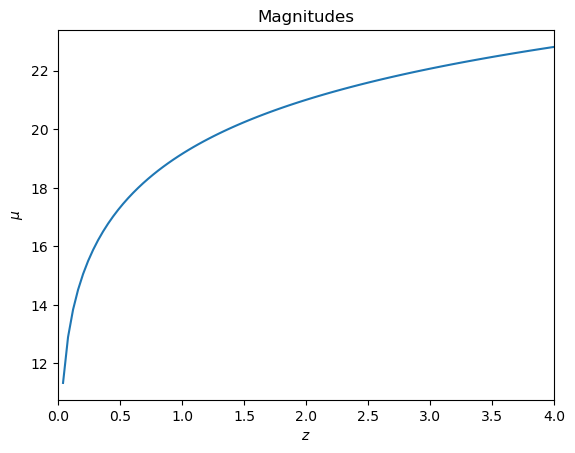

In [3]:

#DA = results.luminosity_distance(z)
plt.plot(z, mu)
plt.xlabel('$z$')
plt.ylabel(r'$\mu$')
plt.title('Magnitudes')
#plt.ylim([0,2000])
plt.xlim([0,4]);

Dati

In [4]:
#leggo i dati 
data = np.loadtxt("fit_exercise_data.txt")

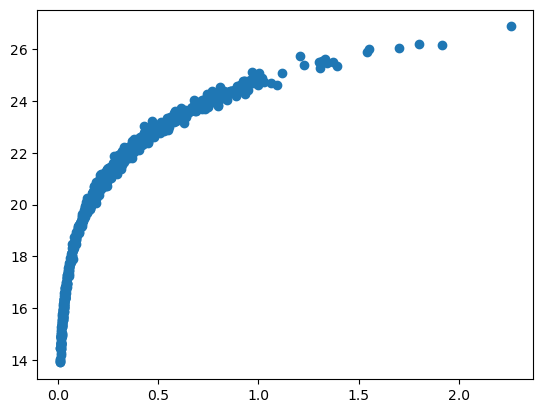

In [5]:
plt.plot(data[:,0], data[:,1], 'o')
obs_z = data[:,0]
obs_mu = data[:,1]
#dati già puliti con covarianza già fatta 
covariance = np.loadtxt("fit_exercise_covariance.txt") 

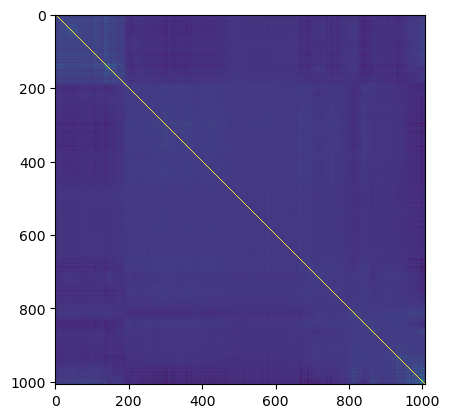

In [6]:
correlation = np.corrcoef(covariance)
#e poi la plotto
plt.imshow(correlation, interpolation="nearest") #, cmpa='hot', 

In [7]:
inv_cov= np.linalg.inv(covariance)

In [8]:
def likelihood(omegam):
    pars= camb.CAMBparams()
    H0=70.
    h= H0/100.
#come divido la materia totale in barioni e CDM
#per la frazione dei barioni
#omega cdm sarà la stessa cosa 

    pars.set_cosmology(H0=67.5,ombh2=omegam * h**2 *0.15, omch2= omegam * h**2 * 0.85)
    results = camb.get_background(pars)
#print 
    mu= 5* np.log10(results.luminosity_distance(obs_z))
    #diff= mu_model -mu_obs 
    #return np.exp(-0.5* np.dot(diff, np.linlag.solve(cov,diff)))
    residuals = mu - obs_mu 
    like = -0.5 * np.dot(residuals, np.dot(inv_cov, residuals))
    ones = np.ones_like(residuals)
    temp_1 = np.dot(ones, np.dot(inv_cov, residuals))
    temp_2 = np.dot(ones, np.dot(inv_cov, ones))
    like += 0.5 * temp_1**2 / temp_2
    return like



In [9]:
omegam_grid= np.linspace(0.1, 0.9, 100)
likelihoods = np.array([likelihood(omegam) for omegam in omegam_grid])
likelihoods = likelihoods - np.max(likelihoods)
 

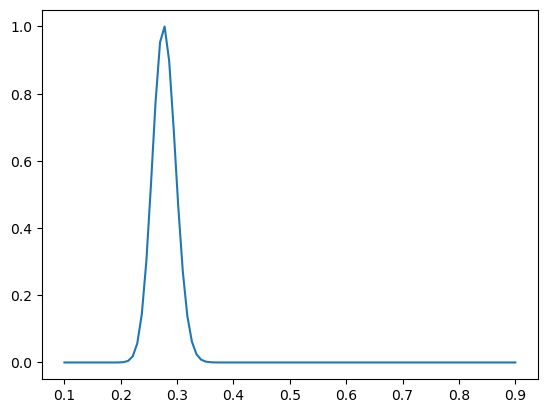

In [10]:
plt.plot(omegam_grid, np.exp(likelihoods))



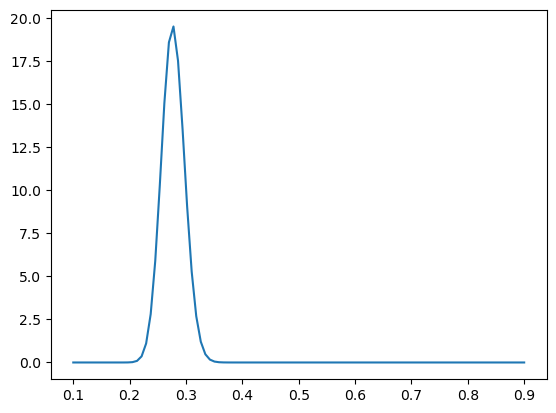

In [11]:
norm = np.trapezoid(np.exp(likelihoods), omegam_grid)
posterior= np.exp(likelihoods)/norm
plt.plot(omegam_grid, posterior)


In [12]:
omegam=0.3

pars= camb.CAMBparams()
H0=70.
h= H0/100.
#come divido la materia totale in barioni e CDM
#per la frazione dei barioni
#omega cdm sarà la stessa cosa 

pars.set_cosmology(H0=67.5,ombh2=omegam * h**2 *0.15, omch2= omegam * h**2 * 0.85)
results = camb.get_background(pars)
#print 
mu= 5* np.log10(results.luminosity_distance(obs_z))

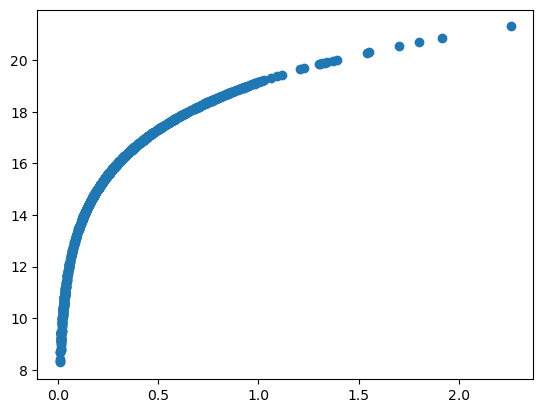

In [13]:
plt.plot(obs_z , mu , 'o')

In [14]:
#cosa sono i residui 
residuals = mu - obs_mu 
chi2 = -0.5 * np.dot(residuals, np.dot(inv_cov, residuals))
ones = np.ones_like(residuals)
temp_1 = np.dot(ones, np.dot(inv_cov, residuals))
temp_2 = np.dot(ones, np.dot(inv_cov, ones))
like += 0.5 * temp_1**2 / temp_2


NameError: name 'like' is not defined

In [ ]:
ones.shape, residuals.shape, inv_cov.shape